# Import Packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Scaling
from sklearn.preprocessing import RobustScaler
# Train Test Split
from sklearn.model_selection import train_test_split
# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn import metrics
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import tensorflow as tf
#import tensorflow_decision_forests as tfdf

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

print('Packages imported...')
#Packages imported...
#!pip install torch
#!pip install tensorflow

Packages imported...


# Reading Data

In [2]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
table_name = 'CPG_NPD_NEW_PRODUCT_ENCODING'
df = my_session.sql("select * from {}".format(table_name))
df = df.to_pandas()
#sales_bangalore_2022 = sf_df.to_pandas()
df.head()

,DATE,MARKT_HIER_SHORT,MARKT_HIER_LONG,MARKT_HIER_LEVEL_NAME,PROD_HIER_SHORT,PROD_HIER_LEVEL_NAME,1 CCF level 0,PACK_SIZE,PRODUCT_TYPE,MANUFACTURER,...,UNITS_LAST_2_MONTHS,PRICE_LAST_MONTH,PRICE_LAST_2_MONTH,RANK,NO_OF_REGIONS,NO_OF_MANUFACTURER,NO_OF_BRAND,No_Of_SUB-BRAND,NO_OF_PACK_SIZE,New Product Included
0,2021-12-01,PROVINCE 1,TOTAL WEST - OTHER WEST PROVINCE 1,FMCG PROVINCE 1 / PROVINCE 2,300 ml_ Fruit Juices _Minute Paid_Simple_Simpl...,VARIANT,Beverages,300 ml,Fruit Juices,Minute Paid,...,1183.0,30.791221,31.044801,1,2,1,1,1,4,1
1,2021-12-01,PROVINCE 1,TOTAL WEST - OTHER WEST PROVINCE 1,FMCG PROVINCE 1 / PROVINCE 2,350 ml_ Fruit Juices _Minute Paid_Simple_Simpl...,VARIANT,Beverages,350 ml,Fruit Juices,Minute Paid,...,455288.0,11.852610,12.022880,1,2,1,1,1,4,1
2,2021-12-01,PROVINCE 1,TOTAL WEST - OTHER WEST PROVINCE 1,FMCG PROVINCE 1 / PROVINCE 2,400 ml_ Fruit Juices _Minute Paid_Simple_Simpl...,VARIANT,Beverages,400 ml,Fruit Juices,Minute Paid,...,1653.0,5.723744,6.086509,1,2,1,1,1,4,1
3,2021-12-01,PROVINCE 1,TOTAL WEST - OTHER WEST PROVINCE 1,FMCG PROVINCE 1 / PROVINCE 2,690 ml_ Fruit Juices _Minute Paid_Simple_Simpl...,VARIANT,Beverages,690 ml,Fruit Juices,Minute Paid,...,67.0,86.347826,99.462687,1,2,1,1,1,4,1
4,2021-12-01,PROVINCE 2,TOTAL WEST - OTHER WEST PROVINCE 2,FMCG PROVINCE 1 / PROVINCE 2,300 ml_ Fruit Juices _Minute Paid_Simple_Simpl...,VARIANT,Beverages,300 ml,Fruit Juices,Minute Paid,...,3449.0,31.111846,28.417222,1,2,1,1,1,4,1


In [3]:
#df = pd.read_csv("C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/Final_Data_36_Month_New_Old_classification.csv",encoding='latin-1')
#print(df.head(1))
#print(df.describe)
print(df.columns)
#print(df.shape)


Index(['DATE', 'MARKT_HIER_SHORT', 'MARKT_HIER_LONG', 'MARKT_HIER_LEVEL_NAME',
       'PROD_HIER_SHORT', 'PROD_HIER_LEVEL_NAME', '1 CCF level 0', 'PACK_SIZE',
       'PRODUCT_TYPE', 'MANUFACTURER', 'BRAND', 'SUB-BRAND', 'VARIANT', 'KEY',
       'UNITS', 'VOLUME', 'VALUE', 'PRICE', 'SALES_LAST_MONTH',
       'SALES_LAST_2_MONTHS', 'VOLUME_LAST_MONTH', 'VOLUME_LAST_2_MONTHS',
       'UNITS_LAST_MONTH', 'UNITS_LAST_2_MONTHS', 'PRICE_LAST_MONTH',
       'PRICE_LAST_2_MONTH', 'RANK', 'NO_OF_REGIONS', 'NO_OF_MANUFACTURER',
       'NO_OF_BRAND', 'No_Of_SUB-BRAND', 'NO_OF_PACK_SIZE',
       'New Product Included'],
      dtype='object')


# Aggreagating and Grouping the Data at Market and Product Hierarchy

In [4]:
df = df.groupby(['MARKT_HIER_LONG','1 CCF level 0','PRODUCT_TYPE','VARIANT','DATE']).agg({'PRICE': 'mean','UNITS': 'sum',
    'VOLUME' : 'sum', 'VALUE': 'sum','New Product Included' : 'mean',
       'PRICE': 'mean', 'NO_OF_MANUFACTURER': 'mean', 'NO_OF_BRAND': 'mean', 'No_Of_SUB-BRAND': 'mean',
       'NO_OF_PACK_SIZE': 'mean', 'NO_OF_REGIONS': 'mean', 'PRICE_LAST_MONTH': 'mean',
       'SALES_LAST_MONTH': 'sum', 'VOLUME_LAST_MONTH': 'sum', 'UNITS_LAST_MONTH': 'sum',
       'SALES_LAST_2_MONTHS': 'sum', 'VOLUME_LAST_2_MONTHS': 'sum', 'UNITS_LAST_2_MONTHS': 'sum',
       'PRICE_LAST_2_MONTH': 'mean'},dropna=False).reset_index()

cols = ['SALES_LAST_MONTH','SALES_LAST_2_MONTHS', 'VOLUME_LAST_MONTH', 'VOLUME_LAST_2_MONTHS',
       'UNITS_LAST_MONTH', 'UNITS_LAST_2_MONTHS', 'PRICE_LAST_MONTH','PRICE_LAST_2_MONTH']
df[cols] = df[cols].replace({0:np.nan}) 
df.dropna(subset=['SALES_LAST_MONTH','SALES_LAST_2_MONTHS', 'VOLUME_LAST_MONTH', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_MONTH', 'UNITS_LAST_2_MONTHS', 'PRICE_LAST_MONTH','PRICE_LAST_2_MONTH'], inplace=True)
#df['Dates'] = pd.to_datetime(df['Dates'],format='%d-%m-%Y')
df = df.sort_values(by=['DATE'])
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#while grouping in pandas it replace null by zero, how to avoid that
#df.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/data_Grouped_{current_time}.csv",index=False)

# Understanding the data

# The shape of the data

In [5]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (4509, 23)


# Preview of the first 5 rows of the data

In [6]:
df.head(5)

,MARKT_HIER_LONG,1 CCF level 0,PRODUCT_TYPE,VARIANT,DATE,PRICE,UNITS,VOLUME,VALUE,New Product Included,...,NO_OF_PACK_SIZE,NO_OF_REGIONS,PRICE_LAST_MONTH,SALES_LAST_MONTH,VOLUME_LAST_MONTH,UNITS_LAST_MONTH,SALES_LAST_2_MONTHS,VOLUME_LAST_2_MONTHS,UNITS_LAST_2_MONTHS,PRICE_LAST_2_MONTH
2677,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Carbonated Soft Drinks,Code Red,2021-07-01,7.507576,264,1693,1982,0.0,...,1.0,2.0,7.500000,2175.0,1696.0,290.0,5229.0,1745.0,697.0,7.502152
2967,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Carbonated Soft Drinks,Root Beer,2021-07-01,9.193548,651,3231,5985,0.0,...,1.0,2.0,8.861520,7231.0,3248.0,816.0,8659.0,3245.0,793.0,10.919294
3005,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Carbonated Soft Drinks,Tonic,2021-07-01,16.358382,173,1744,2830,0.0,...,2.0,2.0,18.706349,2357.0,1738.0,126.0,5233.0,1761.0,309.0,16.935275
3204,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Coffee,Donut Shop Decaf,2021-07-01,19.059701,134,1040,2554,0.0,...,1.0,2.0,20.699203,10391.0,1083.0,502.0,81008.0,1373.0,2987.0,27.120187
3213,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Coffee,Donut Shop Regular,2021-07-01,13.248366,918,2017,12162,0.0,...,1.0,2.0,13.259843,6736.0,1915.0,508.0,4638.0,1876.0,350.0,13.251429


# Checking the number of unique values in each column

In [7]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
MARKT_HIER_LONG,2
1 CCF level 0,1
PRODUCT_TYPE,9
VARIANT,61
DATE,36
PRICE,4489
UNITS,4306
VOLUME,4230
VALUE,4490
New Product Included,2


In [8]:
df.columns

Index(['MARKT_HIER_LONG', '1 CCF level 0', 'PRODUCT_TYPE', 'VARIANT', 'DATE',
       'PRICE', 'UNITS', 'VOLUME', 'VALUE', 'New Product Included',
       'NO_OF_MANUFACTURER', 'NO_OF_BRAND', 'No_Of_SUB-BRAND',
       'NO_OF_PACK_SIZE', 'NO_OF_REGIONS', 'PRICE_LAST_MONTH',
       'SALES_LAST_MONTH', 'VOLUME_LAST_MONTH', 'UNITS_LAST_MONTH',
       'SALES_LAST_2_MONTHS', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_2_MONTHS',
       'PRICE_LAST_2_MONTH'],
      dtype='object')

#  Separating the columns in categorical and continuous

In [9]:
cat_cols = ['MARKT_HIER_LONG', '1 CCF level 0', 'PRODUCT_TYPE', 'VARIANT']
con_cols = ['PRICE', 'UNITS', 'VOLUME', 'VALUE', 'NO_OF_MANUFACTURER', 'NO_OF_BRAND', 'No_Of_SUB-BRAND',
       'NO_OF_PACK_SIZE', 'NO_OF_REGIONS', 'PRICE_LAST_MONTH',
       'SALES_LAST_MONTH', 'VOLUME_LAST_MONTH', 'UNITS_LAST_MONTH',
       'SALES_LAST_2_MONTHS', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_2_MONTHS','PRICE_LAST_2_MONTH']
target_col = ["New Product Included"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['MARKT_HIER_LONG', '1 CCF level 0', 'PRODUCT_TYPE', 'VARIANT']
The continuous cols are :  ['PRICE', 'UNITS', 'VOLUME', 'VALUE', 'NO_OF_MANUFACTURER', 'NO_OF_BRAND', 'No_Of_SUB-BRAND', 'NO_OF_PACK_SIZE', 'NO_OF_REGIONS', 'PRICE_LAST_MONTH', 'SALES_LAST_MONTH', 'VOLUME_LAST_MONTH', 'UNITS_LAST_MONTH', 'SALES_LAST_2_MONTHS', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_2_MONTHS', 'PRICE_LAST_2_MONTH']
The target variable is :   ['New Product Included']


# Summary statistics

In [10]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,4509.0,14.445117,1.119721e+01,0.500000,7.501805,11.596789,18.288424,7.563653e+01
UNITS,4509.0,397653.890885,1.149210e+06,3.000000,5812.000000,32829.000000,151681.000000,1.316561e+07
VOLUME,4509.0,98601.282102,2.030189e+05,18.000000,7809.000000,23149.000000,67004.000000,1.356425e+06
VALUE,4509.0,935427.422932,1.969977e+06,2.000000,57528.000000,230229.000000,721949.000000,2.058970e+07
NO_OF_MANUFACTURER,4509.0,1.329120,7.098600e-01,1.000000,1.000000,1.000000,1.000000,4.000000e+00
NO_OF_BRAND,4509.0,1.506986,1.266859e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+01
No_Of_SUB-BRAND,4509.0,1.781992,2.279139e+00,1.000000,1.000000,1.000000,1.000000,1.900000e+01
NO_OF_PACK_SIZE,4509.0,3.080284,2.547636e+00,1.000000,1.000000,2.000000,4.000000,1.400000e+01
NO_OF_REGIONS,4509.0,1.964072,1.861317e-01,1.000000,2.000000,2.000000,2.000000,2.000000e+00
PRICE_LAST_MONTH,4509.0,14.257524,1.116164e+01,0.500000,7.352941,11.464818,18.083123,7.563653e+01


#  Missing values

In [12]:
df.isnull().sum()

MARKT_HIER_LONG         0
1 CCF level 0           0
PRODUCT_TYPE            0
VARIANT                 0
DATE                    0
PRICE                   0
UNITS                   0
VOLUME                  0
VALUE                   0
New Product Included    0
NO_OF_MANUFACTURER      0
NO_OF_BRAND             0
No_Of_SUB-BRAND         0
NO_OF_PACK_SIZE         0
NO_OF_REGIONS           0
PRICE_LAST_MONTH        0
SALES_LAST_MONTH        0
VOLUME_LAST_MONTH       0
UNITS_LAST_MONTH        0
SALES_LAST_2_MONTHS     0
VOLUME_LAST_2_MONTHS    0
UNITS_LAST_2_MONTHS     0
PRICE_LAST_2_MONTH      0
dtype: int64

# Count plot of target

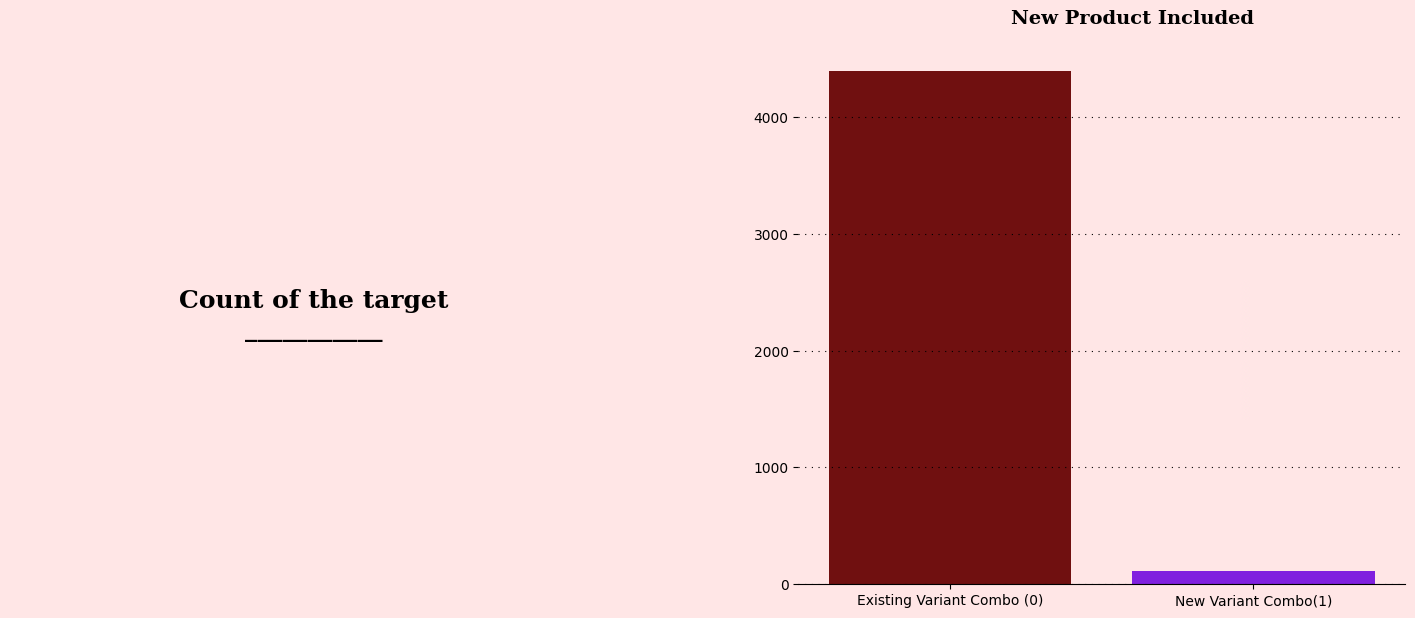

In [16]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.20,4800,"New Product Included",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'New Product Included',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Existing Variant Combo (0)","New Variant Combo(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Correlation matrix of continuous features

In [13]:
df_corr = df[con_cols].corr().transpose()
df_corr

,PRICE,UNITS,VOLUME,VALUE,NO_OF_MANUFACTURER,NO_OF_BRAND,No_Of_SUB-BRAND,NO_OF_PACK_SIZE,NO_OF_REGIONS,PRICE_LAST_MONTH,SALES_LAST_MONTH,VOLUME_LAST_MONTH,UNITS_LAST_MONTH,SALES_LAST_2_MONTHS,VOLUME_LAST_2_MONTHS,UNITS_LAST_2_MONTHS,PRICE_LAST_2_MONTH
PRICE,1.000000,-0.057455,0.165872,0.194385,0.051451,-0.011356,-0.000532,0.007912,-0.044560,0.917111,0.155198,0.162081,-0.064660,0.144884,0.161345,-0.062963,0.880816
UNITS,-0.057455,1.000000,0.787883,0.638861,0.096641,0.157128,0.070862,0.624434,0.066519,-0.065888,0.587365,0.776879,0.933653,0.599722,0.779468,0.953542,-0.066845
VOLUME,0.165872,0.787883,1.000000,0.877152,0.084111,0.125858,0.056196,0.578464,0.084158,0.151507,0.857464,0.995396,0.776807,0.854510,0.994698,0.780650,0.140584
VALUE,0.194385,0.638861,0.877152,1.000000,0.116899,0.130630,0.075838,0.455603,0.089058,0.172705,0.849437,0.851030,0.580205,0.795797,0.845046,0.590135,0.152389
NO_OF_MANUFACTURER,0.051451,0.096641,0.084111,0.116899,1.000000,0.843519,0.796276,0.189003,0.089514,0.049472,0.118176,0.088033,0.098012,0.113724,0.086762,0.098381,0.050502
NO_OF_BRAND,-0.011356,0.157128,0.125858,0.130630,0.843519,1.000000,0.971282,0.203475,0.077264,-0.013899,0.133060,0.128087,0.158062,0.131625,0.127510,0.158593,-0.014355
No_Of_SUB-BRAND,-0.000532,0.070862,0.056196,0.075838,0.796276,0.971282,1.000000,0.122975,0.066243,-0.005177,0.080729,0.059228,0.072006,0.079685,0.058717,0.072374,-0.006735
NO_OF_PACK_SIZE,0.007912,0.624434,0.578464,0.455603,0.189003,0.203475,0.122975,1.000000,0.148295,0.000328,0.453522,0.577461,0.618911,0.453713,0.577171,0.620511,-0.002474
NO_OF_REGIONS,-0.044560,0.066519,0.084158,0.089058,0.089514,0.077264,0.066243,0.148295,1.000000,-0.045013,0.088838,0.084087,0.066192,0.088931,0.083899,0.066047,-0.044023
PRICE_LAST_MONTH,0.917111,-0.065888,0.151507,0.172705,0.049472,-0.013899,-0.005177,0.000328,-0.045013,1.000000,0.170759,0.152696,-0.063343,0.138427,0.148241,-0.068197,0.920673


# Plotting Correlation Matrix

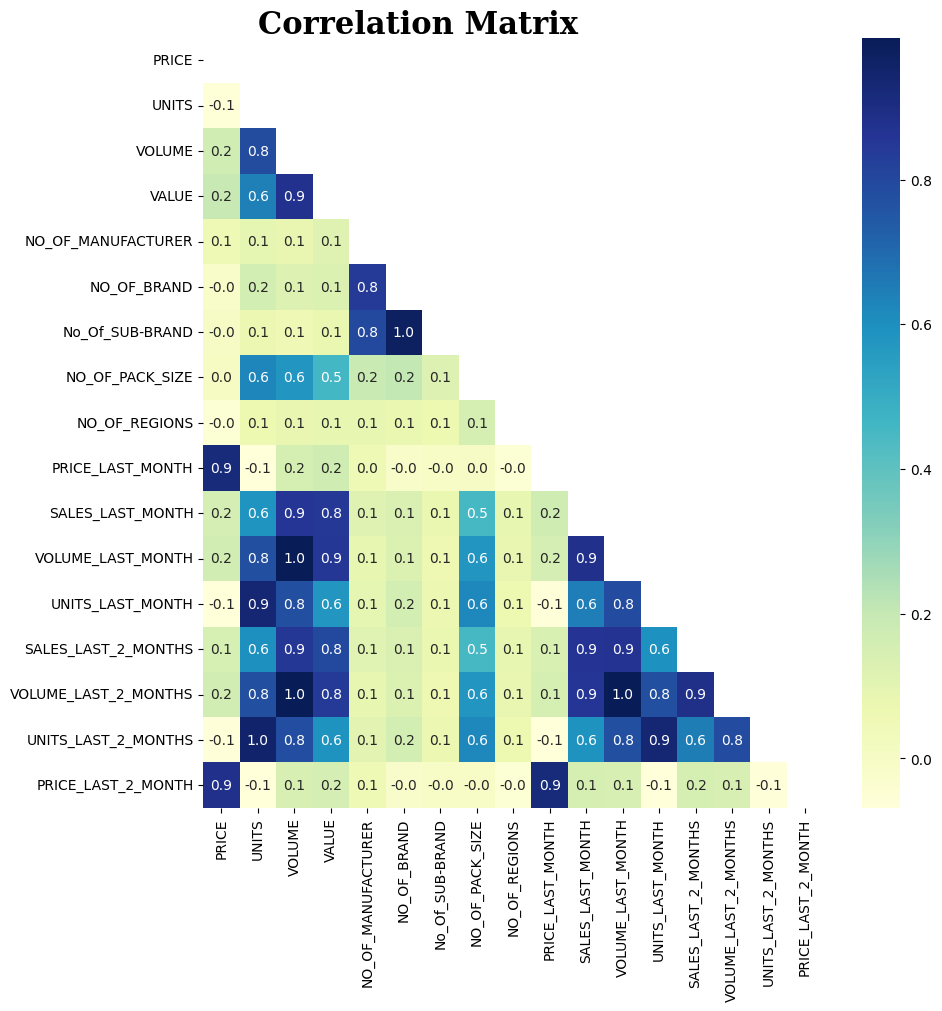

In [17]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

#  Scaling and Encoding features

In [19]:
# creating a copy of df
df1 = df
df1= df1.drop(['DATE'],axis=1)

# define the columns to be encoded and scaled
cat_cols = ['MARKT_HIER_LONG', '1 CCF level 0', 'PRODUCT_TYPE', 'VARIANT']
con_cols = ['PRICE', 'UNITS', 'VOLUME', 'VALUE','NO_OF_MANUFACTURER', 'NO_OF_BRAND', 'No_Of_SUB-BRAND',
       'NO_OF_PACK_SIZE', 'NO_OF_REGIONS', 'PRICE_LAST_MONTH',
       'SALES_LAST_MONTH', 'VOLUME_LAST_MONTH', 'UNITS_LAST_MONTH',
       'SALES_LAST_2_MONTHS', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_2_MONTHS',
       'PRICE_LAST_2_MONTH']

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['New Product Included'],axis=1)
y = df1[['New Product Included']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
print(X.head(5))
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#X.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/Scaled_encoded_{current_time}.csv",index=False)
#The first 5 rows of

The first 5 rows of X are
         PRICE     UNITS    VOLUME     VALUE  NO_OF_MANUFACTURER  NO_OF_BRAND  \
2677 -0.379101 -0.223248 -0.362463 -0.343528                 0.0          0.0   
2967 -0.222798 -0.220595 -0.336481 -0.337503                 0.0          0.0   
3005  0.441435 -0.223872 -0.361601 -0.342251                 1.0          1.0   
3204  0.691868 -0.224139 -0.373494 -0.342667                 0.0          0.0   
3213  0.153114 -0.218765 -0.356990 -0.328206                 0.0          0.0   

      No_Of_SUB-BRAND  NO_OF_PACK_SIZE  NO_OF_REGIONS  PRICE_LAST_MONTH  ...  \
2677              0.0        -0.333333            0.0         -0.369501  ...   
2967              0.0        -0.333333            0.0         -0.242615  ...   
3005              1.0         0.000000            0.0          0.674875  ...   
3204              0.0        -0.333333            0.0          0.860599  ...   
3213              0.0        -0.333333            0.0          0.167287  ...   

      

# Dealing with Class Imbalance problem by oversampling the minority class

In [22]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
#print(X_res.head(5))
print("The shape of X_resample is      ", X_res.shape)
print("The shape of y_resample is       ",y_res.shape)
print("The shape of X_original is      ", X.shape)
print("The shape of y_original is       ",y.shape)
#print(y_res.head(5))
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#X_res.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/DataFrame_X_res_{current_time}.csv",index=False)
#y.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/DataFrame_y_res_{current_time}.csv",index=False)
# Now X_res and y_res have a balanced class distribution
res2 = pd.concat([X_res, y_res], axis=1, join='inner')
#res2.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/DataFrame_res2_{current_time}.csv",index=False)

The shape of X_resample is       (8790, 86)
The shape of y_resample is        (8790, 1)
The shape of X_original is       (4509, 86)
The shape of y_original is        (4509, 1)


# Plotting Output after balancing the class

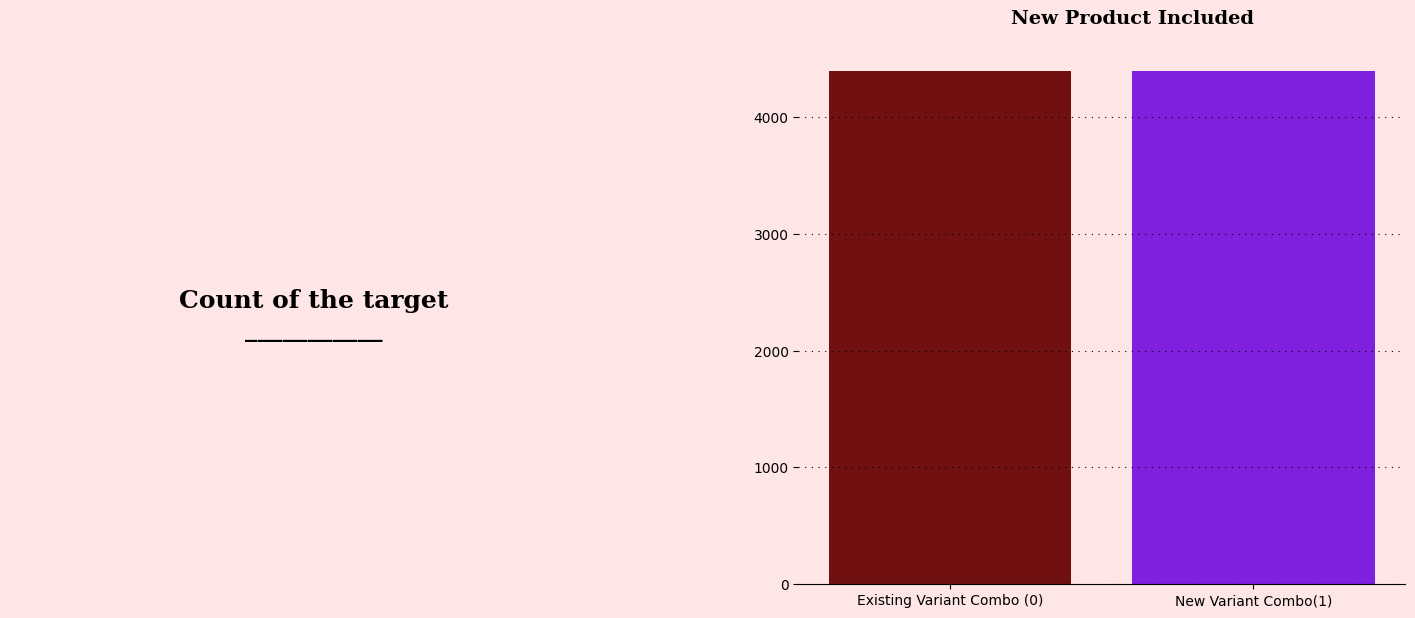

In [23]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.20,4800,"New Product Included",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=y_res, x = 'New Product Included',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Existing Variant Combo (0)","New Variant Combo(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Train and test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (7032, 86)
The shape of X_test is        (1758, 86)
The shape of y_train is       (7032, 1)
The shape of y_test is        (1758, 1)


# Linear Classifiers

# Support Vector Machines

The test accuracy score of SVM is  0.8850967007963595


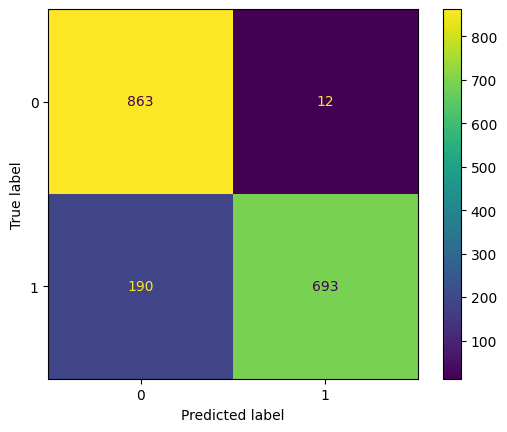

{'Accuracy': 0.8850967007963595, 'Precision': 0.9829787234042553, 'Sensitivity_recall': 0.7848244620611552, 'Specificity': 0.9862857142857143, 'F1_score': 0.8727959697732998}


In [25]:
# instantiating the object and fitting
#clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


# Logistic Regression


The test accuracy score of Logistric Regression is  0.8862343572241184


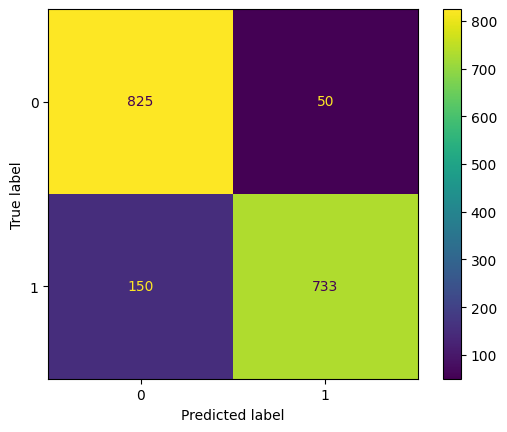

{'Accuracy': 0.8862343572241184, 'Precision': 0.9361430395913155, 'Sensitivity_recall': 0.8301245753114382, 'Specificity': 0.9428571428571428, 'F1_score': 0.879951980792317}


In [26]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))


# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


# ROC Curve

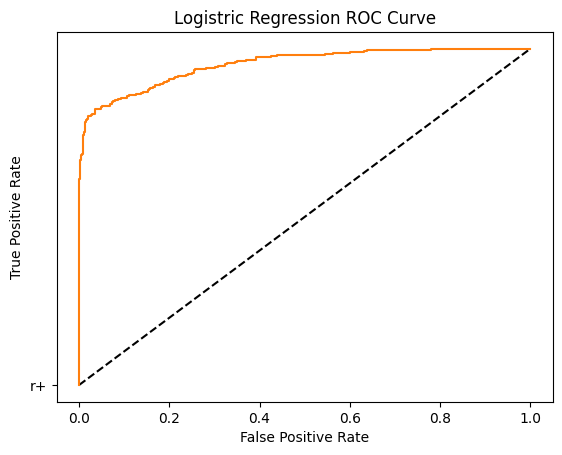

In [27]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

# Decision Tree

The test accuracy score of Decision Tree is  0.9482366325369739


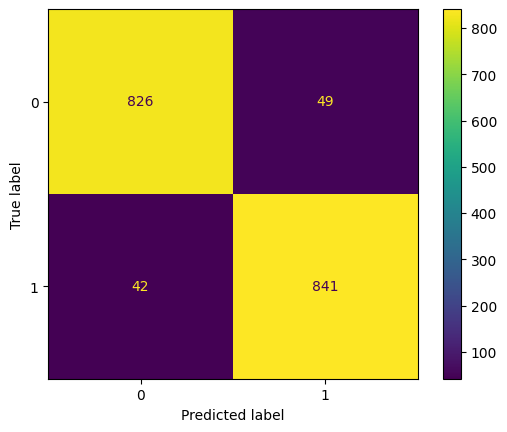

{'Accuracy': 0.9482366325369739, 'Precision': 0.9449438202247191, 'Sensitivity_recall': 0.9524348810872028, 'Specificity': 0.944, 'F1_score': 0.9486745628877609}


In [28]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

# Random Forest

The test accuracy score of Random Forest is  0.9823663253697383


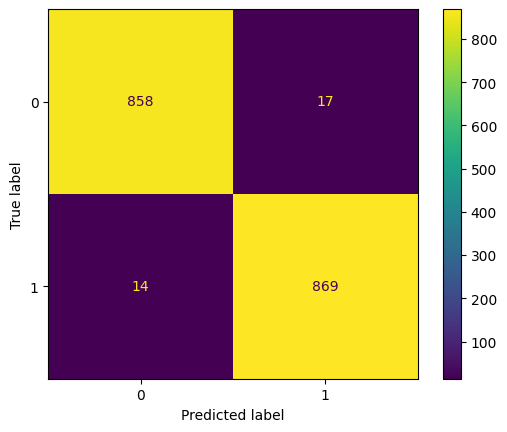

{'Accuracy': 0.9823663253697383, 'Precision': 0.9808126410835214, 'Sensitivity_recall': 0.984144960362401, 'Specificity': 0.9805714285714285, 'F1_score': 0.9824759751271904}


In [29]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

# Steps to validating the best Model

# Step-1 Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier

# Assume 'rf_model' is your pre-trained Random Forest model
# 'X_train', 'y_train' are your training features and labels
# 'X_val', 'y_val' are your validation features and labels
# 'feature_names' is a list of your feature names

# 1. Cross-Validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")

"""By using cross-validation, you’re able to estimate the performance of your 
model in a more robust way compared to using a single train-test split. 
This method helps to mitigate overfitting and gives a better indication of how the model will perform on unseen data."""

""" Result Interpretation Random Forest model, obtained from a 5-fold cross-validation process. 
Each score represents the accuracy of your model on a different fold of the data. Here’s what these scores indicate:
First Fold: The model had an accuracy of approximately 97.87%.
Second Fold: The model had an accuracy of approximately 98.29%.
Third Fold: The model had an accuracy of approximately 97.94%.
Fourth Fold: The model had an accuracy of approximately 99.00%.
Fifth Fold: The model had an accuracy of approximately 98.44%.
These scores are quite high, which suggests that your model is performing consistently well 
across different subsets of your dataset. The variation in the scores is relatively small, 
indicating that the model is stable and not highly sensitive to the specific data it’s trained on.
These scores are quite high, which suggests that your model is performing consistently well across different subsets
of your dataset. The variation in the scores is relatively small, indicating that the model is stable
and not highly sensitive to the specific data it’s trained on.

In cross-validation, multiple rounds of training and validation are conducted, each time with a 
different partition of the data being held out for validation. The resulting array of scores provides insight
into how the model might perform on unseen data.
"""
"""
It’s also important to look at the mean and standard deviation of these scores to get a better understanding 
of the model’s performance:

Mean Accuracy: This is the average of the scores, which gives you an overall indication
of how well the model performs.
Standard Deviation: This measures the amount of variation or dispersion in the scores.
A lower standard deviation suggests that the model has more consistent performance across different folds.
"""
mean_accuracy = sum(scores) / len(scores)
std_deviation = (sum((x - mean_accuracy) ** 2 for x in scores) / len(scores)) ** 0.5
print("mean accuracy : ", mean_accuracy)
print("standard deviation : ",std_deviation)

"""
The mean accuracy and standard deviation of your cross-validation scores are excellent indicators
of your Random Forest model’s performance:

Mean Accuracy: 0.9831
 (or 98.31%)
Standard Deviation: 0.0041
 (or 0.41%)

The mean accuracy of 98.31% is outstanding, showing that, on average, your model correctly predicts 
the outcome nearly 98.31% of the time across the different folds in the cross-validation.
The standard deviation of 0.41% is very low, which means that the performance of your model is consistent
across different subsets of the data. A low standard deviation in cross-validation scores is desirable
as it indicates that the model is stable and its performance is nothighly dependent on the particular data it was trained on.
In summary, these results suggest that your Random Forest classifier is both accurate and reliable, 
which is a strong indication that it should perform well on unseen data, 
assuming the data is representative of the same distribution as your training set
"""




Cross-validation scores: [0.98081023 0.98365316 0.97368421 0.98790896 0.98079659]
mean accuracy :  0.9813706310956901
standard deviation :  0.004640783331562982


'\nThe mean accuracy and standard deviation of your cross-validation scores are excellent indicators\nof your Random Forest model’s performance:\n\nMean Accuracy: 0.9831\n (or 98.31%)\nStandard Deviation: 0.0041\n (or 0.41%)\n\nThe mean accuracy of 98.31% is outstanding, showing that, on average, your model correctly predicts \nthe outcome nearly 98.31% of the time across the different folds in the cross-validation.\nThe standard deviation of 0.41% is very low, which means that the performance of your model is consistent\nacross different subsets of the data. A low standard deviation in cross-validation scores is desirable\nas it indicates that the model is stable and its performance is nothighly dependent on the particular data it was trained on.\nIn summary, these results suggest that your Random Forest classifier is both accurate and reliable, \nwhich is a strong indication that it should perform well on unseen data, \nassuming the data is representative of the same distribution as 

# Step -2 Learning Curves

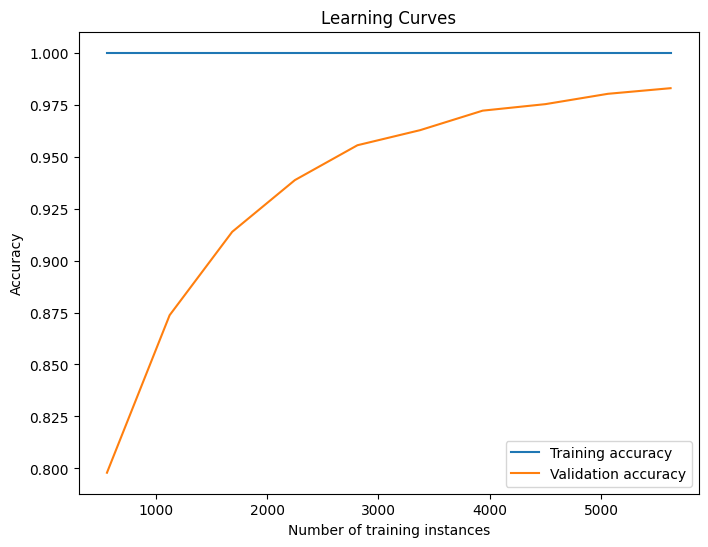

In [31]:
# 2. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation accuracy')
plt.xlabel('Number of training instances')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Step-3 Feature Importance

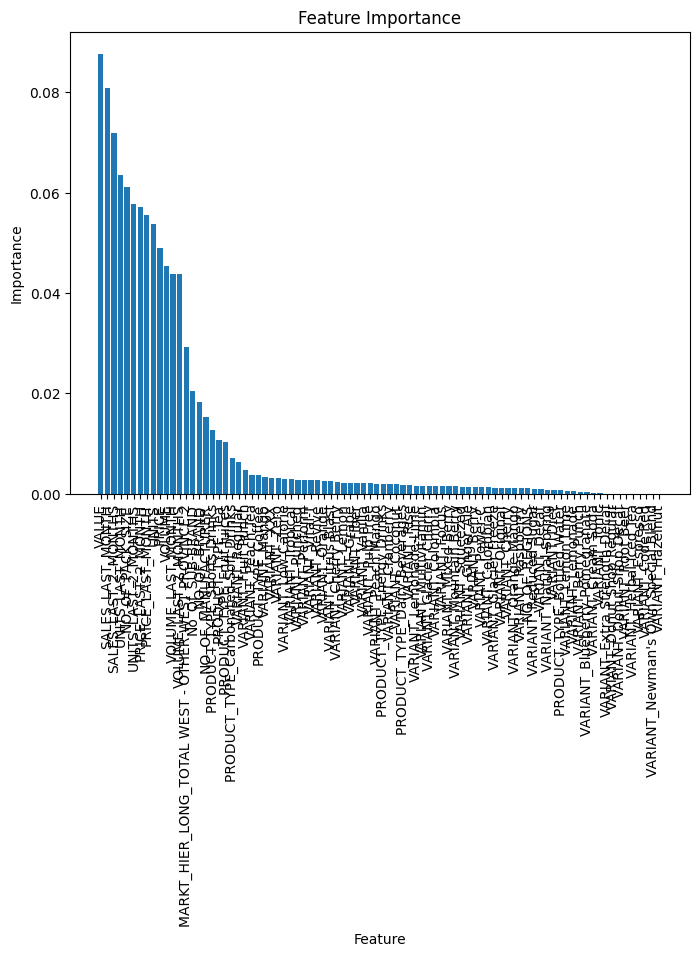

In [32]:
# 3. Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Step-4 External Validation

In [33]:
# 4. External Validation
val_accuracy = rf.score(X_test, y_test)
print(f"Validation accuracy on external set: {val_accuracy}")

Validation accuracy on external set: 0.9823663253697383


# Gradient Boosting Classifier - without tuning

The test accuracy score of Gradient Boosting Classifier is  0.7912400455062572


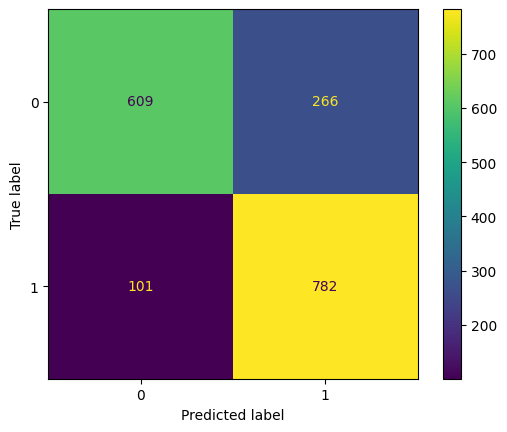

{'Accuracy': 0.7912400455062572, 'Precision': 0.7461832061068703, 'Sensitivity_recall': 0.8856172140430351, 'Specificity': 0.696, 'F1_score': 0.8099430346970482}


In [34]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

# Starting with Regression on Predicting the Sales 

In [36]:
df.columns

Index(['MARKT_HIER_LONG', '1 CCF level 0', 'PRODUCT_TYPE', 'VARIANT', 'DATE',
       'PRICE', 'UNITS', 'VOLUME', 'VALUE', 'New Product Included',
       'NO_OF_MANUFACTURER', 'NO_OF_BRAND', 'No_Of_SUB-BRAND',
       'NO_OF_PACK_SIZE', 'NO_OF_REGIONS', 'PRICE_LAST_MONTH',
       'SALES_LAST_MONTH', 'VOLUME_LAST_MONTH', 'UNITS_LAST_MONTH',
       'SALES_LAST_2_MONTHS', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_2_MONTHS',
       'PRICE_LAST_2_MONTH'],
      dtype='object')

# Scaling and Encoding the Variables

In [38]:
# creating a copy of df
df1 = df
df1= df1.drop(['DATE'],axis=1)

# define the columns to be encoded and scaled
cat_cols = ['MARKT_HIER_LONG', '1 CCF level 0', 'PRODUCT_TYPE', 'VARIANT','New Product Included']
con_cols = ['PRICE', 'UNITS', 'VOLUME','NO_OF_MANUFACTURER', 'NO_OF_BRAND', 'No_Of_SUB-BRAND',
       'NO_OF_PACK_SIZE', 'NO_OF_REGIONS', 'PRICE_LAST_MONTH',
       'SALES_LAST_MONTH', 'VOLUME_LAST_MONTH', 'UNITS_LAST_MONTH',
       'SALES_LAST_2_MONTHS', 'VOLUME_LAST_2_MONTHS', 'UNITS_LAST_2_MONTHS',
       'PRICE_LAST_2_MONTH']

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['VALUE'],axis=1)
y = df1[['VALUE']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
print(X.head(5))
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#X.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/Scaled_encoded_{current_time}.csv",index=False)
#The first 5 rows of

The first 5 rows of X are
         PRICE     UNITS    VOLUME  NO_OF_MANUFACTURER  NO_OF_BRAND  \
2677 -0.379101 -0.223248 -0.362463                 0.0          0.0   
2967 -0.222798 -0.220595 -0.336481                 0.0          0.0   
3005  0.441435 -0.223872 -0.361601                 1.0          1.0   
3204  0.691868 -0.224139 -0.373494                 0.0          0.0   
3213  0.153114 -0.218765 -0.356990                 0.0          0.0   

      No_Of_SUB-BRAND  NO_OF_PACK_SIZE  NO_OF_REGIONS  PRICE_LAST_MONTH  \
2677              0.0        -0.333333            0.0         -0.369501   
2967              0.0        -0.333333            0.0         -0.242615   
3005              1.0         0.000000            0.0          0.674875   
3204              0.0        -0.333333            0.0          0.860599   
3213              0.0        -0.333333            0.0          0.167287   

      SALES_LAST_MONTH  ...  VARIANT_Rise  VARIANT_Root Beer  \
2677         -0.342245  ...     

# Train Test SPLIT

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (3607, 86)
The shape of X_test is        (902, 86)
The shape of y_train is       (3607, 1)
The shape of y_test is        (902, 1)


In [45]:
# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(),
    "XGBoost Regression": xgb.XGBRegressor()
}

# Function to train and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2": r2}
        print(f"{name} - MSE: {mse}, R2: {r2}")
    return results

# Evaluate all models
results = evaluate_models(models, X_train, X_test, y_train, y_test)

Linear Regression - MSE: 151559076687.51855, R2: 0.9623221640903532
Ridge Regression - MSE: 150962907437.8632, R2: 0.9624703727470291
Lasso Regression - MSE: 150662029001.19858, R2: 0.9625451716215878
Elastic Net Regression - MSE: 461411187931.2715, R2: 0.8852924192617401
Decision Tree Regression - MSE: 177038279252.62637, R2: 0.9559879923974489
Random Forest Regression - MSE: 131892171326.22697, R2: 0.9672113891321571
Gradient Boosting Regression - MSE: 167649536982.28232, R2: 0.9583220491784185
Support Vector Regression - MSE: 4459591497346.182, R2: -0.10866178610669364
K-Nearest Neighbors Regression - MSE: 292244836741.0312, R2: 0.9273474525918849
XGBoost Regression - MSE: 109032445797.90642, R2: 0.9728943545224217


# Model Validation - XGBOOST Regression

# Step -1 Cross Validation

In [46]:
xgb_model = xgb.XGBRegressor()
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE: ", -cv_scores.mean())

Cross-Validation MSE:  129725807970.23544


# Step -2 Residual Analysis

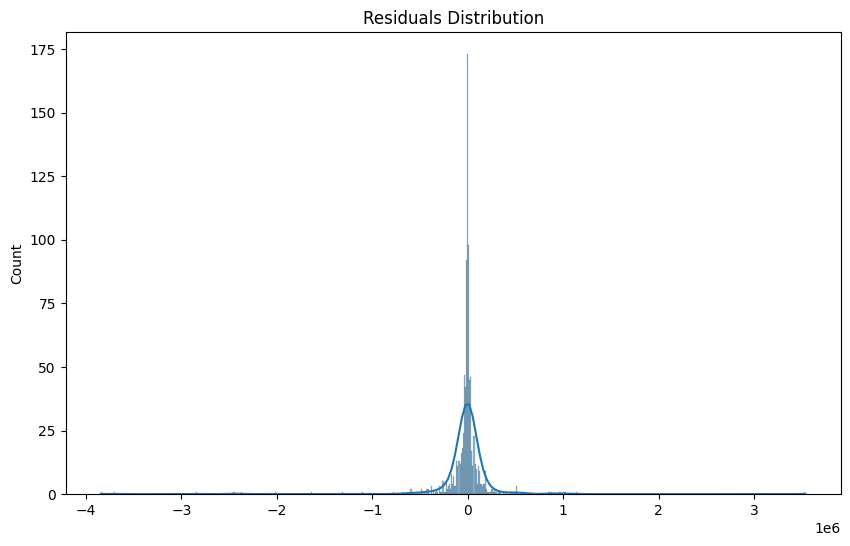

In [48]:
# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Convert y_test to a NumPy array
y_test_array = y_test.values.flatten()

# Calculate residuals
residuals = y_test_array - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


# Step -3 Hyperparameter Tuning

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation MSE: ", -grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best Cross-Validation MSE:  149492222579.50677


In [ ]:
''' The results from your grid search are quite promising! Here’s a breakdown:

Best Parameters
learning_rate: 0.2
max_depth: 3
n_estimators: 300
These parameters indicate that the model performs best with a relatively high learning rate,
a moderate depth for the trees, and a substantial number of estimators. This combination helps 
the model to learn effectively without overfitting.

Best Cross-Validation MSE
149,492,222,579.50677
This MSE value is lower than the initial MSE you reported for the XGBoost model (109,032,445,797.90642), 
suggesting that the hyperparameter tuning has improved the model’s performance. 
'''

# Step -4 Validate the tuned model

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse}, Test R2: {r2}")